In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import defaultdict
from utils import getPR_sstar, getPR_size, getf1
import pickle
import tskit
# https://personal.sron.nl/~pault/#sec:qualitative
pal = ["#DDAA33", "#BB5566", "#004488", "#000000", "#65FE08"]

In [13]:
# process s*
os.chdir('/project/lgarcia1_998/jcahoon/argml/')
x=[]
y=[]


growth_f1=[]
growth_err=[]
noGrowth_f1=[]
noGrowth_err=[]
# growth

f1_mean, f1_std, precision, recall =  getPR_size("Distribution", "transformer", "growth", 50)
x.append(recall)
y.append(precision)
growth_f1.append(f1_mean)
growth_err.append(f1_std)
print("[0] Distribution", "transformer", "growth", "50K", f1_mean, f1_std)


f1_mean, f1_std, precision, recall =  getPR_size("Distribution", "transformer", "growth", 250)
x.append(recall)
y.append(precision)
growth_f1.append(f1_mean)
growth_err.append(f1_std)
print("[1] Distribution", "transformer", "growth", "250K", f1_mean, f1_std)
# 600K
f1_mean, f1_std, precision, recall = getPR_size("Distribution", "transformer", "growth", 600, start=4)
x.append(recall)
y.append(precision)
print("[2] Distribution", "transformer", "growth", "in", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_size("Distribution", "transformer", "growth", 600)
x.append(recall)
y.append(precision)
growth_f1.append(f1_mean)
growth_err.append(f1_std)
print("[3] Distribution", "transformer", "growth", "out", f1_mean, f1_std)

# 
f1_mean, f1_std, precision, recall = getPR_sstar("growth", "in")
x.append(recall)
y.append(precision)
print("[4] Distribution", "sstar", "growth", "in", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_sstar("growth", "out")
x.append(recall)
y.append(precision)
print("[5] Distribution", "sstar", "growth", "out", f1_mean, f1_std)

# no growth
f1_mean, f1_std, precision, recall =  getPR_size("Distribution", "transformer", "noGrowth", 50)
x.append(recall)
y.append(precision)
noGrowth_f1.append(f1_mean)
noGrowth_err.append(f1_std)
print("[6] Distribution", "transformer", "noGrowth", "50K", f1_mean, f1_std)

f1_mean, f1_std, precision, recall =  getPR_size("Distribution", "transformer", "noGrowth", 250)
x.append(recall)
y.append(precision)
noGrowth_f1.append(f1_mean)
noGrowth_err.append(f1_std)
print("[7] Distribution", "transformer", "noGrowth", "250K", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_size("Distribution", "transformer", "noGrowth", 600, start=4)
x.append(recall)
y.append(precision)
print("[8] Distribution","transformer", "noGrowth", "in", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_size("Distribution", "transformer", "noGrowth", 600)
x.append(recall)
y.append(precision)
noGrowth_f1.append(f1_mean)
noGrowth_err.append(f1_std)
print("[9] Distribution", "transformer", "noGrowth", "out", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_sstar("noGrowth", "in")
x.append(recall)
y.append(precision)
print("[10] Distribution", "sstar", "noGrowth", "in", f1_mean, f1_std)

f1_mean, f1_std, precision, recall = getPR_sstar("noGrowth", "out")
x.append(recall)
y.append(precision)
print("[11] Distribution", "sstar", "noGrowth", "out", f1_mean, f1_std)

os.chdir('/scratch1/jcahoon/arg-ml/plot/')

[0] Distribution transformer growth 50K 38.66146544936153 3.422490145644527
[1] Distribution transformer growth 250K 49.54871359661265 4.729820627272759
[2] Distribution transformer growth in 43.61989621996128 2.4270516751611573
[3] Distribution transformer growth out 50.17413098238275 4.7155666845692705
[4] Distribution sstar growth in 43.22907564473718 3.1990724837488367
[5] Distribution sstar growth out 46.024794853142076 2.3104810613168953
[6] Distribution transformer noGrowth 50K 30.902989778934547 3.9503573307888025
[7] Distribution transformer noGrowth 250K 36.98939222083839 3.5417731051770587
[8] Distribution transformer noGrowth in 37.105913047573615 2.6371067388785834
[9] Distribution transformer noGrowth out 36.716998446867926 3.182097436132444
[10] Distribution sstar noGrowth in 41.11710226943629 4.495844307502807
[11] Distribution sstar noGrowth out 30.423867605407356 4.596593781846348


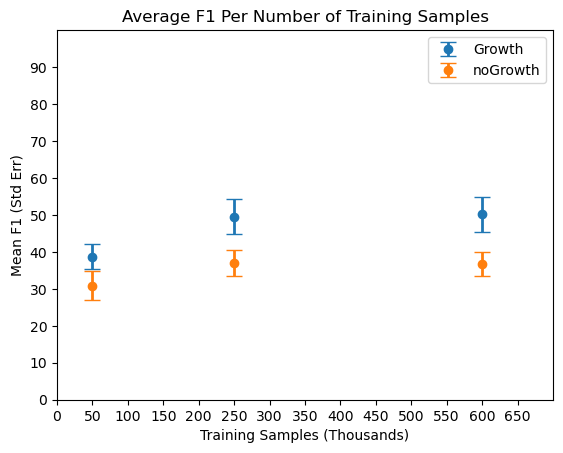

In [14]:
size = [50, 250, 600]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data with error bars
ax.errorbar(size, growth_f1, growth_err, fmt='o', linewidth=2, capsize=6, label="Growth")
ax.errorbar(size, noGrowth_f1, noGrowth_err, fmt='o', linewidth=2, capsize=6, label="noGrowth")


# Set axis limits and ticks
ax.set(xlim=(0, 700), 
       xticks=np.arange(0, 700, 50), 
       ylim=(0, 100), 
       yticks=np.arange(0, 100,10), 
       xlabel="Training Samples (Thousands)", 
       ylabel="Mean F1 (Std Err)", 
       title="Average F1 Per Number of Training Samples")
plt.legend()
# Show the plot
plt.show()

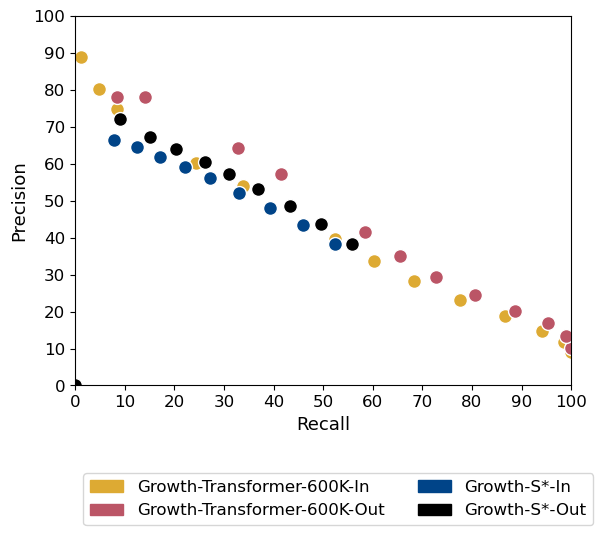

In [15]:

fig, ax = plt.subplots()
# labels
label_600k_in = mpatches.Patch(color=pal[0], label="Growth-Transformer-600K-In")
label_600k_out = mpatches.Patch(color=pal[1], label="Growth-Transformer-600K-Out")
in_ss_label = mpatches.Patch(color=pal[2], label="Growth-S*-In")
out_ss_label = mpatches.Patch(color=pal[3], label="Growth-S*-Out")


ax.legend(handles=[label_600k_in, label_600k_out, in_ss_label, out_ss_label  ], fontsize=12, loc="lower left", bbox_to_anchor=(0,-0.4), ncol=2)

# scatter
plt_600k_in = ax.scatter(x[2], y[2], c=pal[0], s=100,edgecolors='white', linewidth=1)
plt_600k_out = ax.scatter(x[3], y[3], c=pal[1], s=100,edgecolors='white', linewidth=1)
in_ss_plt = ax.scatter(x[4], y[4], c=pal[2], s=100,edgecolors='white', linewidth=1)
out_ss_plt = ax.scatter(x[5], y[5], c=pal[3], s=100,edgecolors='white', linewidth=1)


plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Recall", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.xticks(np.arange(0, 101, 10))
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 101, 10))
plt.yticks(fontsize=12)
# plt.show()
plt.savefig('pr_distribution_growth.png', dpi=300, bbox_inches="tight", pad_inches=1)

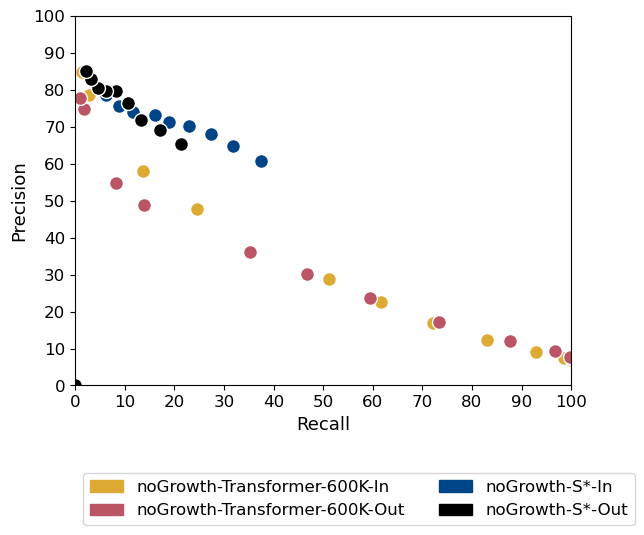

In [16]:
fig, ax = plt.subplots()
# labels
label_600k_in = mpatches.Patch(color=pal[0], label="noGrowth-Transformer-600K-In")
label_600k_out = mpatches.Patch(color=pal[1], label="noGrowth-Transformer-600K-Out")
in_ss_label = mpatches.Patch(color=pal[2], label="noGrowth-S*-In")
out_ss_label = mpatches.Patch(color=pal[3], label="noGrowth-S*-Out")


ax.legend(handles=[label_600k_in, label_600k_out, in_ss_label, out_ss_label  ], fontsize=12, loc="lower left", bbox_to_anchor=(0,-0.4), ncol=2)

# scatter
plt_600k_in = ax.scatter(x[8], y[8], c=pal[0], s=100,edgecolors='white', linewidth=1)
plt_600k_out = ax.scatter(x[9], y[9], c=pal[1], s=100,edgecolors='white', linewidth=1)
in_ss_plt = ax.scatter(x[10], y[10], c=pal[2], s=100,edgecolors='white', linewidth=1)
out_ss_plt = ax.scatter(x[11], y[11], c=pal[3], s=100,edgecolors='white', linewidth=1)


plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Recall", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.xticks(np.arange(0, 101, 10))
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 101, 10))
plt.yticks(fontsize=12)
# plt.show()
plt.savefig('pr_distribution_noGrowth.png', dpi=300, bbox_inches="tight", pad_inches=1)

Chromosome Painting

[]

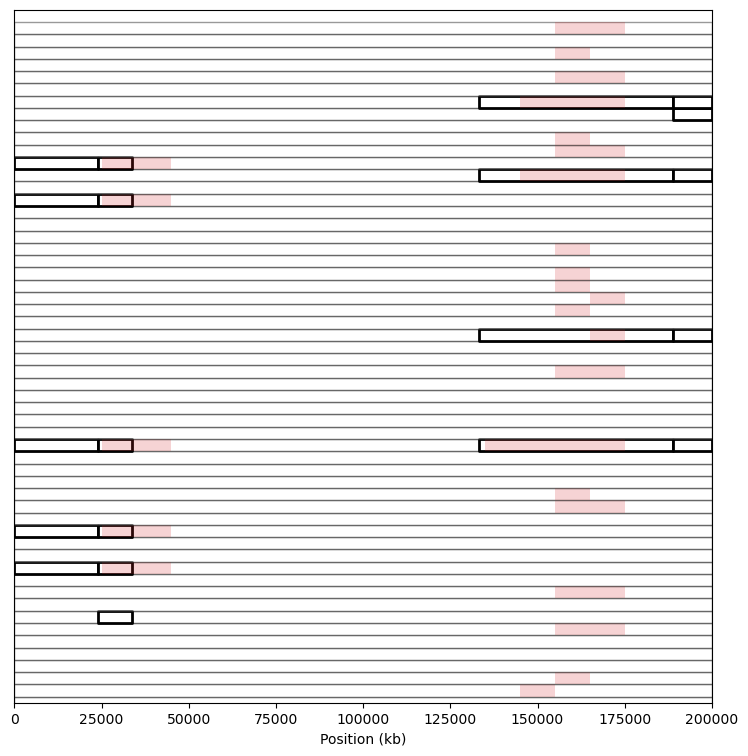

In [35]:
"""
Description: Generate a diploid chromosome painting
Parameters:
    tree: tree number 0-99
    seed: seed for RNG, model selection [4-13, 100-109]
    model_type: (growth, noGrowth)
    samples: (50, 250. 600)
"""
tree=7
seed=4
model_type="growth"
samples = 600
df= pd.read_csv(f'/scratch1/jcahoon/argml/data/distribution_{model_type}_validate/segments/{seed}/200kb_{seed}_{tree}.csv')
id2Index={}
for idx, i in enumerate(df.node_sample.unique()):
    id2Index[i] = idx
with open(f'/project/lgarcia1_998/jcahoon/argml/ml/pr_curve/Distribution_transformer_50k_sw_{model_type}_{seed}_{samples}K_y_out.npy', "rb") as f:
    pred_arr= np.array(pickle.load(f))
with open(f'/project/lgarcia1_998/jcahoon/argml/ml/pr_curve/Distribution_transformer_50k_sw_{model_type}_{seed}_{samples}K_y_test.npy', "rb") as f:
    test_arr= pickle.load(f)
    
ts = tskit.load(f'/scratch1/jcahoon/argml/data/distribution_{model_type}_validate/trees/{seed}/200kb_{seed}_{tree}.tree')
fig, ax = plt.subplots(figsize=(9,9))
idToBars = defaultdict(list)
idToBars_pred = defaultdict(list)
cutoff = 0.90

for hap in range(56): # iterate the haplotypes
    # get true seg
    true=[]
    df_subset = df[(df['node_sample']==2*hap) | (df['node_sample']==(2*hap+1))]
    if not df_subset.empty:
        for row in df_subset.iterrows():
            row=row[1]
#             cnt +=1
            true.append((int(row.left), int(row.right)))
    start_hap = hap*2
    end_hap = hap*2+2

    start_tree = tree*16
    end_tree = tree*16+16
    pred_sw = pred_arr[start_tree:end_tree, start_hap:end_hap]
    pred = []
    in_seg = False
    start_pos = 0 
    end_pos = 0
    for pos in range(16):
        hit = pred_sw[pos,:][0] > cutoff or pred_sw[pos,:][1] > cutoff
        if hit and not in_seg:
            in_seg = True
            start = int((pos*10000+ pos*10000 + 50000)/2)
        elif not hit and in_seg:
            in_seg = False
            end = int((pos*10000+ pos*10000 + 50000)/2)
            pred.append((start,end))
            start = 0
            end = 0
        elif hit and pos == 15:
            end = int((pos*10000+ pos*10000 + 50000)/2)
            pred.append((start,end))
    if len(true) > 0:
        for i in true:
            idToBars[hap].append([i[0], i[1]-i[0]])
    if len(pred) > 0:
        for i in pred:
            idToBars_pred[hap].append([i[0], i[1]-i[0]])
  
for i in range(56):
    ax.broken_barh([(3,199950)], ((i+2)*2, 2), color='white', edgecolor='black', alpha=0.4) # bar outlines
    if len(idToBars[i]) > 0:
        ax.broken_barh(idToBars[i], ((i+2)*2, 2),  facecolors='white', edgecolor='black', linewidth=2, alpha= 1)
    if len(idToBars_pred[i]) > 0:
        ax.broken_barh(idToBars_pred[i], ((i+2)*2, 2), facecolors='tab:red', alpha =0.2)
ax.set_ylim(5, 118)
ax.set_xlim(-5, 200000)
ax.set_xlabel('Position (kb)')
ax.set_yticks([], labels=[])     # Modify y-axis tick labels

[] 0


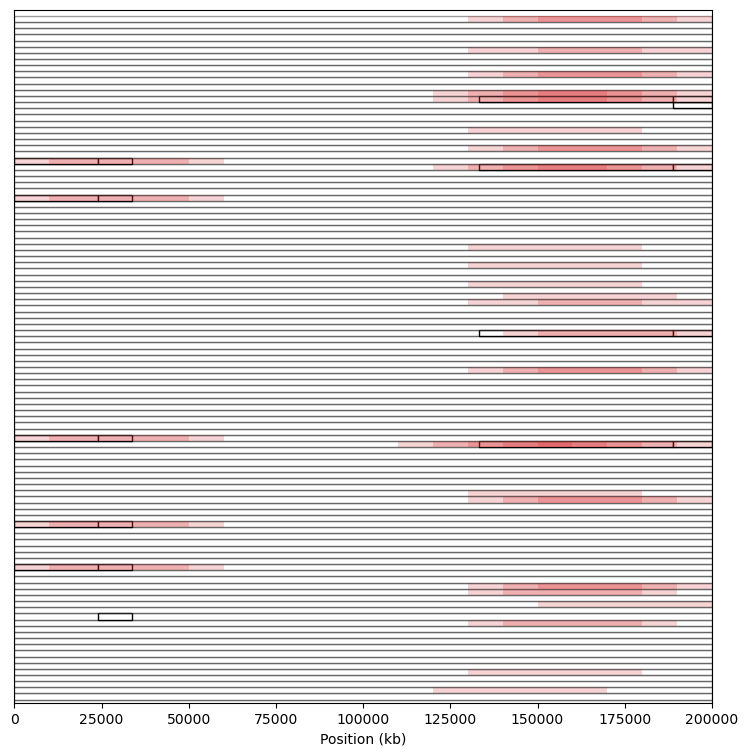

In [36]:

"""
Description: Generate a haploid chromosome painting
Parameters:
    tree: tree number 0-99
    seed: seed for RNG, model selection [4-13, 100-109]
    model_type: (growth, noGrowth)
    samples: (50, 250. 600)
"""
tree=7
seed=4
model_type="growth"
samples = 600
df= pd.read_csv(f'/scratch1/jcahoon/argml/data/distribution_{model_type}_validate/segments/{seed}/200kb_{seed}_{tree}.csv')
id2Index={}
for idx, i in enumerate(df.node_sample.unique()):
    id2Index[i] = idx
with open(f'/project/lgarcia1_998/jcahoon/argml/ml/pr_curve/Distribution_transformer_50k_sw_{model_type}_{seed}_{samples}K_y_out.npy', "rb") as f:
    pred_arr= np.array(pickle.load(f))
with open(f'/project/lgarcia1_998/jcahoon/argml/ml/pr_curve/Distribution_transformer_50k_sw_{model_type}_{seed}_{samples}K_y_test.npy', "rb") as f:
    test_arr= pickle.load(f)
    
ts = tskit.load(f'/scratch1/jcahoon/argml/data/distribution_{model_type}_validate/trees/{seed}/200kb_{seed}_{tree}.tree')
fig, ax = plt.subplots(figsize=(9,9))
idToBars = defaultdict(list)
idToBars_pred = defaultdict(list)
cutoff = 0.90
for hap in range(112): # iterate the haplotypes
    # get true seg
    true=[]
    df_subset = df[df['node_sample']==hap]
    if not df_subset.empty:
        for row in df_subset.iterrows():
            row=row[1]
#             cnt +=1
            true.append((int(row.left), int(row.right)))

    start_tree = tree*16
    end_tree = tree*16+16
    pred_sw = pred_arr[start_tree:end_tree, hap]
#     print(pred_sw)
    pred = []
    in_seg = False
    for pos in range(16):
#         print(pred_sw[pos])
        hit = pred_sw[pos] > cutoff 
#         print(hit)
        if hit:
            pred.append((pos*10000,pos*10000+50000))
    if len(true) > 0:
        for i in true:
            idToBars[hap].append([i[0], i[1]-i[0]])
    if len(pred) > 0:
        for i in pred:
            idToBars_pred[hap].append([i[0], i[1]-i[0]])
  
for i in range(112):
    ax.broken_barh([(3,199950)], ((i+2)*2, 2), color='white', edgecolor='black', alpha=0.4) # bar outlines
    if len(idToBars[i]) > 0:
        ax.broken_barh(idToBars[i], ((i+2)*2, 2),  facecolors='white', edgecolor='black', linewidth=1, alpha= 1)
    if len(idToBars_pred[i]) > 0:
        ax.broken_barh(idToBars_pred[i], ((i+2)*2, 2), facecolors='tab:red', alpha =0.2)

# LINE_WIDTH = 5
# for i in range(5):
#     broken_barh_collection = plt.broken_barh(
#         [(i * 10, 7), ((i + 1) * 10, 5), ((i + 2) * 10, 3)],
#         (i - 0.4, 0.8),
#         facecolors='#00B4FF',
#         edgecolors='face',
#         linewidth=LINE_WIDTH)
#     for p in broken_barh_collection.get_paths():
#         path = p.vertices
#         plt.plot(path[:4, 0], path[:4, 1], color='black', linewidth=LINE_WIDTH)
ax.set_ylim(5, 230)
ax.set_xlim(-5, 200000)
ax.set_xlabel('Position (kb)')
ax.set_yticks([], labels=[])     # Modify y-axis tick labels
# ax.grid(True)                                       # Make grid lines visible
print(miss, len(miss))